In [193]:
#Import data


import pandas as pd
import hvplot.pandas
from MCForecastTools import MCSimulation
import matplotlib as plt
%matplotlib inline
import numpy as np
import yfinance as yf
import datetime as dt
from pandas_datareader import data
import pandas_datareader as pdr
import holoviews as hv
from datetime import timedelta
from pathlib import Path
import seaborn as sns
import pandas_montecarlo
import alpaca_trade_api as tradeapi

 

In [86]:
#Sheldon Whitehouse Republican

tickers = ['AAPL', 'FB', 'GILD', 'NSRGY', 'T', 'BIIB', 'MCHP', 'NFLX','IBM', 'V',]
start = dt.datetime(2021, 1, 1)
end = dt.datetime(2022,7,26)
 
data = pdr.get_data_yahoo(tickers, start,end)
data = data['Adj Close']

In [87]:
sheldon_df = data.dropna()
sheldon_df

Symbols,AAPL,FB,GILD,NSRGY,T,BIIB,MCHP,NFLX,IBM,V
Date,,,,,,,,,,
2021-08-03,146.522873,351.239990,66.742653,123.400154,19.658476,338.000000,72.418892,510.820007,131.182800,235.517426
2021-08-04,146.115219,358.920013,66.178741,122.628349,19.421373,338.100006,72.759216,517.349976,129.989990,235.100220
2021-08-05,146.224594,362.970001,66.236092,121.729546,19.484137,336.589996,73.878899,524.890015,129.999084,238.616745
2021-08-06,145.527512,363.510010,65.739075,120.606041,19.498085,340.000000,73.854240,520.549988,131.201019,239.798843
2021-08-09,145.477722,361.609985,65.433220,120.654892,19.421373,340.200012,73.740791,519.969971,130.095764,238.408157
...,...,...,...,...,...,...,...,...,...,...
2022-07-20,153.039993,183.089996,61.549999,116.750000,20.480000,207.490005,65.550003,216.440002,129.179993,213.369995
2022-07-21,155.350006,183.169998,61.009998,119.129997,18.920000,214.059998,66.199997,223.880005,127.150002,216.190002
2022-07-22,154.089996,169.270004,60.799999,120.430000,18.400000,206.250000,64.720001,220.440002,128.250000,213.699997


In [88]:
sheldon_returns = sheldon_df.pct_change().dropna()
sheldon_returns

Symbols,AAPL,FB,GILD,NSRGY,T,BIIB,MCHP,NFLX,IBM,V
Date,,,,,,,,,,
2021-08-04,-0.002782,0.021865,-0.008449,-0.006254,-0.012061,0.000296,0.004699,0.012783,-0.009093,-0.001771
2021-08-05,0.000749,0.011284,0.000867,-0.007329,0.003232,-0.004466,0.015389,0.014574,0.000070,0.014958
2021-08-06,-0.004767,0.001488,-0.007504,-0.009230,0.000716,0.010131,-0.000334,-0.008268,0.009246,0.004954
2021-08-09,-0.000342,-0.005227,-0.004653,0.000405,-0.003934,0.000588,-0.001536,-0.001114,-0.008424,-0.005799
2021-08-10,-0.003354,-0.001327,0.011394,0.000810,0.008618,-0.008760,0.006689,-0.007943,0.000920,-0.008042
...,...,...,...,...,...,...,...,...,...,...
2022-07-20,0.013510,0.041586,-0.009176,-0.018495,-0.015385,-0.057977,0.015964,0.073451,-0.012989,-0.001357
2022-07-21,0.015094,0.000437,-0.008773,0.020385,-0.076172,0.031664,0.009916,0.034374,-0.015714,0.013217
2022-07-22,-0.008111,-0.075886,-0.003442,0.010912,-0.027484,-0.036485,-0.022356,-0.015365,0.008651,-0.011518


In [89]:
trading_days = 252

In [90]:
one_year_avg_sheldon_return = sheldon_df.mean() * trading_days
one_year_avg_sheldon_return.dropna()


Symbols
AAPL      39370.601728
FB        68192.444881
GILD      16177.384157
NSRGY     31304.663732
T          4706.249805
BIIB      60992.682184
MCHP      18479.203926
NFLX     109528.953361
IBM       32393.698241
V         54057.428904
dtype: float64

In [91]:
sheldon_cummulative_returns = (1 + sheldon_returns).cumprod()
sheldon_cummulative_returns

Symbols,AAPL,FB,GILD,NSRGY,T,BIIB,MCHP,NFLX,IBM,V
Date,,,,,,,,,,
2021-08-04,0.997218,1.021865,0.991551,0.993746,0.987939,1.000296,1.004699,1.012783,0.990907,0.998229
2021-08-05,0.997964,1.033396,0.992410,0.986462,0.991132,0.995828,1.020161,1.027544,0.990977,1.013160
2021-08-06,0.993207,1.034933,0.984963,0.977357,0.991841,1.005917,1.019820,1.019048,1.000139,1.018179
2021-08-09,0.992867,1.029524,0.980381,0.977753,0.987939,1.006509,1.018254,1.017912,0.991714,1.012274
2021-08-10,0.989537,1.028157,0.991551,0.978545,0.996453,0.997692,1.025065,1.009827,0.992626,1.004133
...,...,...,...,...,...,...,...,...,...,...
2022-07-20,1.044479,0.521268,0.922199,0.946109,1.041790,0.613876,0.905151,0.423711,0.984733,0.905963
2022-07-21,1.060244,0.521495,0.914108,0.965396,0.962435,0.633314,0.914126,0.438276,0.969258,0.917936
2022-07-22,1.051645,0.481921,0.910962,0.975931,0.935983,0.610207,0.893689,0.431541,0.977643,0.907364


In [92]:
one_year_sheldon_std = sheldon_df.std() * np.sqrt(trading_days)
one_year_sheldon_std.sort_values()

Symbols
T          19.627116
GILD       61.759622
NSRGY      94.070087
IBM       111.881562
MCHP      122.630333
V         188.205943
AAPL      199.175048
BIIB      704.564437
FB       1197.270784
NFLX     2837.175881
dtype: float64

In [93]:
one_year_sheldon_sharpe_ratio = one_year_avg_sheldon_return / one_year_sheldon_std
one_year_sheldon_sharpe_ratio.dropna()

Symbols
AAPL     197.668343
FB        56.956576
GILD     261.941112
NSRGY    332.780214
T        239.783053
BIIB      86.567926
MCHP     150.690319
NFLX      38.604922
IBM      289.535628
V        287.224878
dtype: float64

In [94]:
one_year_sheldon_sharpe_ratio.hvplot(title= "Sheldon's Sharpe Ratio")

:Curve   [Symbols]   (0)

In [95]:
days_in_trading = 252

In [96]:
sheldon_cum_returns = (1 + sheldon_returns).cumprod()
sheldon_cum_returns

Symbols,AAPL,FB,GILD,NSRGY,T,BIIB,MCHP,NFLX,IBM,V
Date,,,,,,,,,,
2021-08-04,0.997218,1.021865,0.991551,0.993746,0.987939,1.000296,1.004699,1.012783,0.990907,0.998229
2021-08-05,0.997964,1.033396,0.992410,0.986462,0.991132,0.995828,1.020161,1.027544,0.990977,1.013160
2021-08-06,0.993207,1.034933,0.984963,0.977357,0.991841,1.005917,1.019820,1.019048,1.000139,1.018179
2021-08-09,0.992867,1.029524,0.980381,0.977753,0.987939,1.006509,1.018254,1.017912,0.991714,1.012274
2021-08-10,0.989537,1.028157,0.991551,0.978545,0.996453,0.997692,1.025065,1.009827,0.992626,1.004133
...,...,...,...,...,...,...,...,...,...,...
2022-07-20,1.044479,0.521268,0.922199,0.946109,1.041790,0.613876,0.905151,0.423711,0.984733,0.905963
2022-07-21,1.060244,0.521495,0.914108,0.965396,0.962435,0.633314,0.914126,0.438276,0.969258,0.917936
2022-07-22,1.051645,0.481921,0.910962,0.975931,0.935983,0.610207,0.893689,0.431541,0.977643,0.907364


In [97]:
trading_days = 252 
one_year_average_sheldon_return = sheldon_df.mean() * trading_days
one_year_average_sheldon_return

Symbols
AAPL      39370.601728
FB        68192.444881
GILD      16177.384157
NSRGY     31304.663732
T          4706.249805
BIIB      60992.682184
MCHP      18479.203926
NFLX     109528.953361
IBM       32393.698241
V         54057.428904
dtype: float64

In [98]:
one_year_average_sheldon_return.sort_values()

Symbols
T          4706.249805
GILD      16177.384157
MCHP      18479.203926
NSRGY     31304.663732
IBM       32393.698241
AAPL      39370.601728
V         54057.428904
BIIB      60992.682184
FB        68192.444881
NFLX     109528.953361
dtype: float64

In [99]:
one_year_sheldon_std = sheldon_df.std() * np.sqrt(trading_days)
one_year_sheldon_std.sort_values()

Symbols
T          19.627116
GILD       61.759622
NSRGY      94.070087
IBM       111.881562
MCHP      122.630333
V         188.205943
AAPL      199.175048
BIIB      704.564437
FB       1197.270784
NFLX     2837.175881
dtype: float64

In [100]:
sheldon_variance = sheldon_returns.var()
sheldon_variance

Symbols
AAPL     0.000361
FB       0.001123
GILD     0.000140
NSRGY    0.000150
T        0.000275
BIIB     0.000414
MCHP     0.000676
NFLX     0.001541
IBM      0.000217
V        0.000389
dtype: float64

In [101]:
sheldon_cummulative_returns = (1 + sheldon_returns).cumprod()
sheldon_cummulative_returns

Symbols,AAPL,FB,GILD,NSRGY,T,BIIB,MCHP,NFLX,IBM,V
Date,,,,,,,,,,
2021-08-04,0.997218,1.021865,0.991551,0.993746,0.987939,1.000296,1.004699,1.012783,0.990907,0.998229
2021-08-05,0.997964,1.033396,0.992410,0.986462,0.991132,0.995828,1.020161,1.027544,0.990977,1.013160
2021-08-06,0.993207,1.034933,0.984963,0.977357,0.991841,1.005917,1.019820,1.019048,1.000139,1.018179
2021-08-09,0.992867,1.029524,0.980381,0.977753,0.987939,1.006509,1.018254,1.017912,0.991714,1.012274
2021-08-10,0.989537,1.028157,0.991551,0.978545,0.996453,0.997692,1.025065,1.009827,0.992626,1.004133
...,...,...,...,...,...,...,...,...,...,...
2022-07-20,1.044479,0.521268,0.922199,0.946109,1.041790,0.613876,0.905151,0.423711,0.984733,0.905963
2022-07-21,1.060244,0.521495,0.914108,0.965396,0.962435,0.633314,0.914126,0.438276,0.969258,0.917936
2022-07-22,1.051645,0.481921,0.910962,0.975931,0.935983,0.610207,0.893689,0.431541,0.977643,0.907364


In [102]:
tickers = ['SPY']
start = dt.datetime(2021, 1, 1)
end = dt.datetime(2022,7,26)
 
data = pdr.get_data_yahoo(tickers, start,end)
data = data['Adj Close']

In [103]:
spy_df = data.dropna()
spy_df

Symbols,SPY
Date,
2021-01-04,361.251190
2021-01-05,363.739258
2021-01-06,365.913849
2021-01-07,371.350403
2021-01-08,373.466248
...,...
2022-07-20,394.769989
2022-07-21,398.790009
2022-07-22,395.089996


In [104]:
#Nancy Pelosi Democrat
#Import Data

tickers = ['AAPL', 'MSFT', 'NVDA', 'FB', 'AMZN', 'V', 'DIS', 'CRM','GOOG', 'TSLA',]
start = dt.datetime(2021, 1, 1)
end = dt.datetime(2022,7,26)
 
data = pdr.get_data_yahoo(tickers, start,end)
data = data['Adj Close']

In [105]:
#Display Data table 
data.dropna()

Symbols,AAPL,MSFT,NVDA,FB,AMZN,V,DIS,CRM,GOOG,TSLA
Date,,,,,,,,,,
2021-08-03,146.522873,284.794525,198.015198,351.239990,168.311996,235.517441,172.990005,241.130005,136.279999,709.739990
2021-08-04,146.115219,284.189453,202.602097,358.920013,167.735992,235.100220,172.580002,244.169998,136.028503,710.919983
2021-08-05,146.224594,287.175049,206.229614,362.970001,168.799500,238.616760,176.710007,250.559998,136.940002,714.630005
2021-08-06,145.527512,287.115540,203.521469,363.510010,167.246994,239.798828,177.130005,250.589996,137.035995,699.099976
2021-08-09,145.477722,285.994659,202.811935,361.609985,167.093506,238.408142,176.720001,249.320007,138.001999,713.760010
...,...,...,...,...,...,...,...,...,...,...
2022-07-20,153.039993,262.269989,178.070007,183.089996,122.769997,213.369995,103.349998,182.449997,114.699997,742.500000
2022-07-21,155.350006,264.839996,180.500000,183.169998,124.629997,216.190002,104.180000,185.350006,115.040001,815.119995
2022-07-22,154.089996,260.359985,173.190002,169.270004,122.419998,213.699997,102.720001,182.470001,108.360001,816.729980


In [106]:
#Change 

pelosi_df = data.dropna()
pelosi_df

Symbols,AAPL,MSFT,NVDA,FB,AMZN,V,DIS,CRM,GOOG,TSLA
Date,,,,,,,,,,
2021-08-03,146.522873,284.794525,198.015198,351.239990,168.311996,235.517441,172.990005,241.130005,136.279999,709.739990
2021-08-04,146.115219,284.189453,202.602097,358.920013,167.735992,235.100220,172.580002,244.169998,136.028503,710.919983
2021-08-05,146.224594,287.175049,206.229614,362.970001,168.799500,238.616760,176.710007,250.559998,136.940002,714.630005
2021-08-06,145.527512,287.115540,203.521469,363.510010,167.246994,239.798828,177.130005,250.589996,137.035995,699.099976
2021-08-09,145.477722,285.994659,202.811935,361.609985,167.093506,238.408142,176.720001,249.320007,138.001999,713.760010
...,...,...,...,...,...,...,...,...,...,...
2022-07-20,153.039993,262.269989,178.070007,183.089996,122.769997,213.369995,103.349998,182.449997,114.699997,742.500000
2022-07-21,155.350006,264.839996,180.500000,183.169998,124.629997,216.190002,104.180000,185.350006,115.040001,815.119995
2022-07-22,154.089996,260.359985,173.190002,169.270004,122.419998,213.699997,102.720001,182.470001,108.360001,816.729980


In [107]:
pelosi_returns = pelosi_df.pct_change()

In [108]:
#Days in trading
days_in_trading = 252

In [109]:
#cummulative Returns of Dataframe
pelosi_cum_returns = (1 + pelosi_returns).cumprod()
pelosi_cum_returns

Symbols,AAPL,MSFT,NVDA,FB,AMZN,V,DIS,CRM,GOOG,TSLA
Date,,,,,,,,,,
2021-08-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-04,0.997218,0.997875,1.023164,1.021865,0.996578,0.998228,0.997630,1.012607,0.998155,1.001663
2021-08-05,0.997964,1.008359,1.041484,1.033396,1.002896,1.013160,1.021504,1.039108,1.004843,1.006890
2021-08-06,0.993207,1.008150,1.027807,1.034933,0.993672,1.018179,1.023932,1.039232,1.005547,0.985009
2021-08-09,0.992867,1.004214,1.024224,1.029524,0.992761,1.012274,1.021562,1.033965,1.012636,1.005664
...,...,...,...,...,...,...,...,...,...,...
2022-07-20,1.044479,0.920910,0.899274,0.521268,0.729419,0.905963,0.597433,0.756646,0.841650,1.046158
2022-07-21,1.060244,0.929934,0.911546,0.521495,0.740470,0.917936,0.602231,0.768673,0.844144,1.148477
2022-07-22,1.051645,0.914203,0.874630,0.481921,0.727340,0.907364,0.593792,0.756729,0.795128,1.150745


In [110]:
trading_days = 252
one_year_average_pelosi_return = pelosi_df.mean() * trading_days
one_year_average_pelosi_return

Symbols
AAPL     39370.601619
MSFT     74269.002436
NVDA     57677.191749
FB       68192.444881
AMZN     38085.985877
V        54057.428764
DIS      36050.762893
CRM      57241.575486
GOOG     33499.465436
TSLA    220639.701170
dtype: float64

In [111]:
one_year_average_pelosi_return.sort_values()


Symbols
GOOG     33499.465436
DIS      36050.762893
AMZN     38085.985877
AAPL     39370.601619
V        54057.428764
CRM      57241.575486
NVDA     57677.191749
FB       68192.444881
MSFT     74269.002436
TSLA    220639.701170
dtype: float64

In [112]:
one_year_pelosi_std = pelosi_df.std() * np.sqrt(trading_days)
one_year_pelosi_std.sort_values()

Symbols
V        188.205932
AAPL     199.175038
GOOG     203.815063
AMZN     371.788882
MSFT     393.665167
DIS      448.754950
CRM      715.452777
NVDA     750.092375
FB      1197.270784
TSLA    2427.956263
dtype: float64

In [113]:
one_year_pelosi_sharpe_ratio = one_year_average_pelosi_return / one_year_pelosi_std
one_year_pelosi_sharpe_ratio

Symbols
AAPL    197.668352
MSFT    188.660335
NVDA     76.893452
FB       56.956576
AMZN    102.439819
V       287.224894
DIS      80.335076
CRM      80.007482
GOOG    164.362069
TSLA     90.874661
dtype: float64

In [114]:
one_year_pelosi_sharpe_ratio.sort_values()

Symbols
FB       56.956576
NVDA     76.893452
CRM      80.007482
DIS      80.335076
TSLA     90.874661
AMZN    102.439819
GOOG    164.362069
MSFT    188.660335
AAPL    197.668352
V       287.224894
dtype: float64

In [115]:
# Beta, covariance and Variance 
pelosi_variance = pelosi_returns.var()
pelosi_variance

Symbols
AAPL    0.000361
MSFT    0.000343
NVDA    0.001398
FB      0.001123
AMZN    0.000703
V       0.000389
DIS     0.000352
CRM     0.000737
GOOG    0.000412
TSLA    0.001579
dtype: float64

In [116]:
spy_returns = spy_df.pct_change().dropna()
spy_returns

Symbols,SPY
Date,
2021-01-05,0.006887
2021-01-06,0.005978
2021-01-07,0.014857
2021-01-08,0.005698
2021-01-11,-0.006741
...,...
2022-07-20,0.006373
2022-07-21,0.010183
2022-07-22,-0.009278


In [117]:
spy_cum_returns = (1 + spy_returns).cumprod()
spy_cum_returns

Symbols,SPY
Date,
2021-01-05,1.006887
2021-01-06,1.012907
2021-01-07,1.027956
2021-01-08,1.033813
2021-01-11,1.026844
...,...
2022-07-20,1.092785
2022-07-21,1.103913
2022-07-22,1.093671


In [118]:
spy_variance = spy_cum_returns.var()
spy_variance

Symbols
SPY    0.006402
dtype: float64

In [119]:
trading_days = 252
one_year_average_spy_return = spy_df.mean() * trading_days
one_year_average_spy_return


Symbols
SPY    105888.200619
dtype: float64

In [120]:
one_year_spy_std = spy_df.std() * np.sqrt(trading_days)
one_year_spy_std.sort_values()

Symbols
SPY    460.690866
dtype: float64

In [121]:
one_year_spy_std = spy_df.std() * np.sqrt(trading_days)
one_year_spy_std.sort_values()

Symbols
SPY    460.690866
dtype: float64

In [122]:
spy_sharp_ratio = one_year_average_spy_return / one_year_spy_std
spy_sharp_ratio

Symbols
SPY    229.846538
dtype: float64

<AxesSubplot:xlabel='Symbols'>

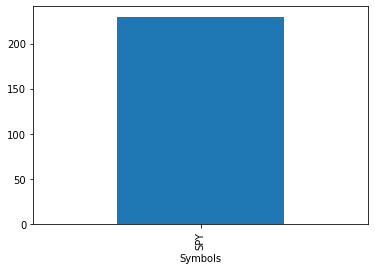

In [123]:
spy_sharp_ratio.plot.bar()

In [124]:
pelosi_spy_df = pd.concat([pelosi_df, spy_df], join="inner", axis=1 )
pelosi_spy_df.head()

Symbols,AAPL,MSFT,NVDA,FB,AMZN,V,DIS,CRM,GOOG,TSLA,SPY
Date,,,,,,,,,,,
2021-08-03,146.522873,284.794525,198.015198,351.239990,168.311996,235.517441,172.990005,241.130005,136.279999,709.739990,434.965668
2021-08-04,146.115219,284.189453,202.602097,358.920013,167.735992,235.100220,172.580002,244.169998,136.028503,710.919983,432.826111
2021-08-05,146.224594,287.175049,206.229614,362.970001,168.799500,238.616760,176.710007,250.559998,136.940002,714.630005,435.567139
2021-08-06,145.527512,287.115540,203.521469,363.510010,167.246994,239.798828,177.130005,250.589996,137.035995,699.099976,436.286865
2021-08-09,145.477722,285.994659,202.811935,361.609985,167.093506,238.408142,176.720001,249.320007,138.001999,713.760010,435.931915


In [125]:
whitehouse_stocks = pd.read_csv(Path("./Whitehouse_returns.csv"), parse_dates = True, infer_datetime_format = True,)

In [126]:
whitehouse_stocks.head()

,Whitehouse Top 10,1 Year Return,1 Year Risk,Sharp
0,NFLX,109610.76330,2832.589674,38.696308
1,FB,68275.10197,1197.655045,57.007318
2,BIIB,61083.79396,708.922332,86.164296
3,V,54081.48665,189.334786,285.639464
4,APPL,39358.87640,199.111502,197.672540


<AxesSubplot:title={'center':'Whitehouse Sharp Ratio Return'}>

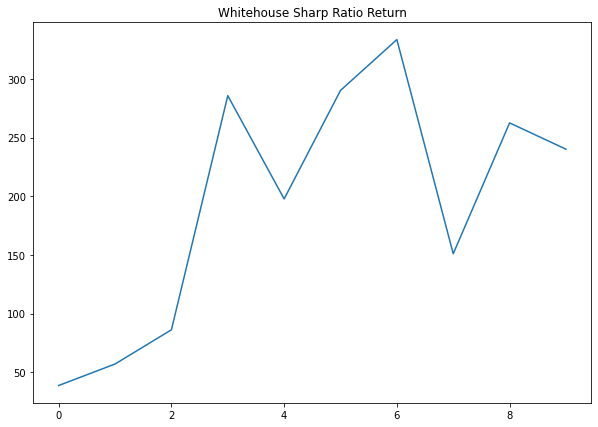

In [127]:
whitehouse_stocks['Sharp'].plot(figsize=(10,7), title = "Whitehouse Sharp Ratio Return")

<AxesSubplot:title={'center':'Whitehouse 1 Year Returns'}>

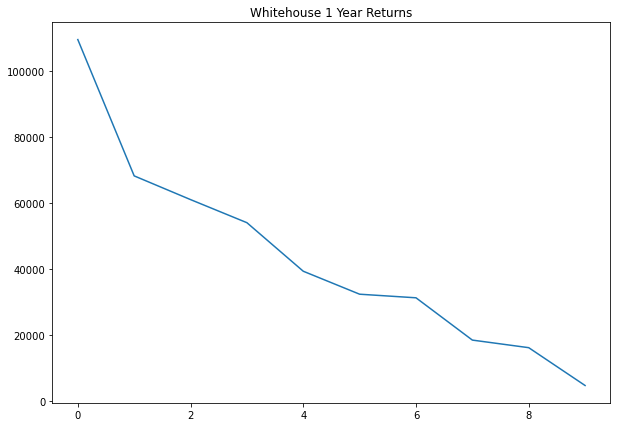

In [128]:
whitehouse_stocks['1 Year Return'].plot(figsize=(10,7), title = "Whitehouse 1 Year Returns")

<AxesSubplot:title={'center':'Whitehosue 1 year Risk'}>

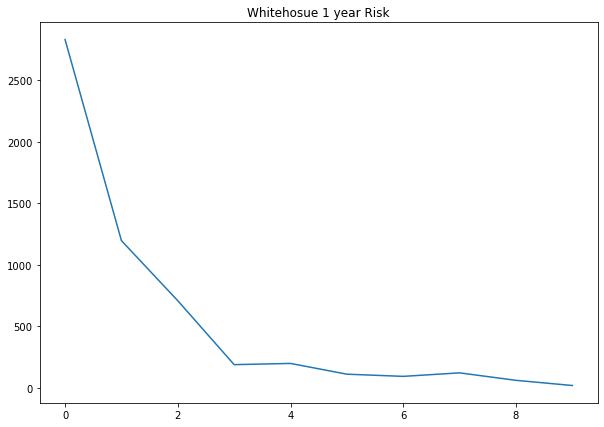

In [129]:
whitehouse_stocks['1 Year Risk'].plot(figsize=(10,7), title = "Whitehosue 1 year Risk")

<AxesSubplot:title={'center':'Whitehouse Fund returns'}, xlabel='Date'>

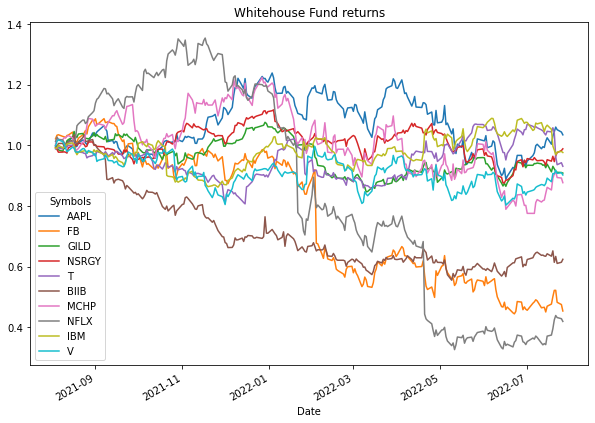

In [130]:
sheldon_cummulative_returns.plot(figsize=(10,7), title = "Whitehouse Fund returns")

In [131]:
pelosi_stocks= pd.read_csv(Path("./Pelosi_returns.csv"), parse_dates = True, infer_datetime_format = True,)

<AxesSubplot:title={'center':'Spy Return'}, xlabel='Date'>

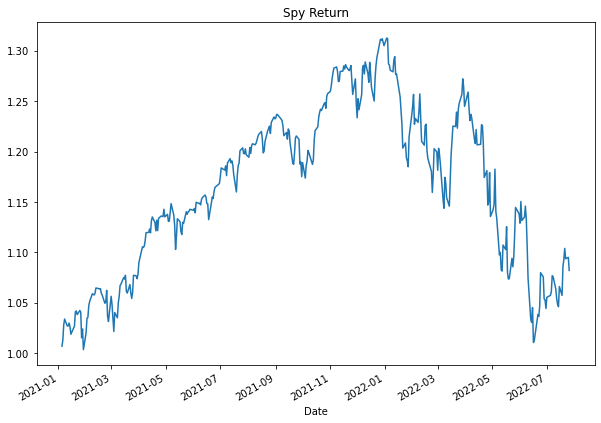

In [132]:
spy_cum_returns['SPY'].plot(figsize=(10,7), title = "Spy Return")

In [133]:
pelosi_funds = pelosi_stocks.drop(columns=['Unnamed: 4','Unnamed: 5','Unnamed: 6','Unnamed: 7','Unnamed: 8'])
pelosi_funds

,Pelosi Top 10 Holdings,1 year returns,1 year risk,Sharp
0,APPL,197000.0,442.071723,442.071723
1,MSFT,371000.0,877.555120,423.018376
2,NVDA,342000.0,1673.721458,172.104114
3,FB,342000.0,2679.523428,127.562791
4,AMZN,191000.0,829.417736,229.781916
5,V,271000.0,427.918729,632.269554
6,DIS,181000.0,1004.779032,179.726105
7,CRM,286000.0,1593.979888,179.645963
8,GOOG,168000.0,453.983789,369.009559
9,TSLA,1100000.0,5436.419077,202.597695


<AxesSubplot:title={'center':'Pelosi Sharp Ratio Return'}>

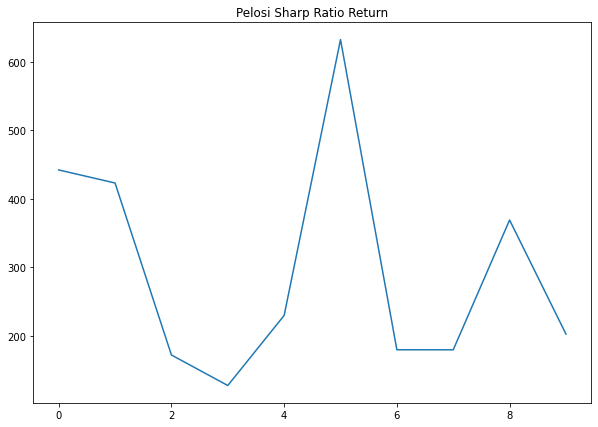

In [134]:
pelosi_funds['Sharp'].plot(figsize=(10,7), title = "Pelosi Sharp Ratio Return")

<AxesSubplot:title={'center':'Pelosi 1 Year Returns'}>

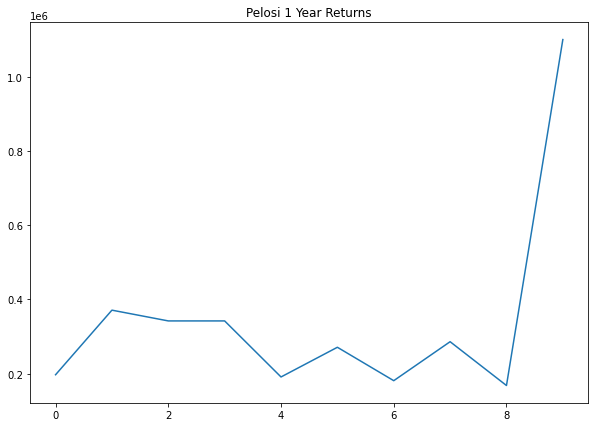

In [135]:
pelosi_funds['1 year returns'].plot(figsize=(10,7), title = "Pelosi 1 Year Returns")

<AxesSubplot:title={'center':'Pelosi 1 year Risk'}>

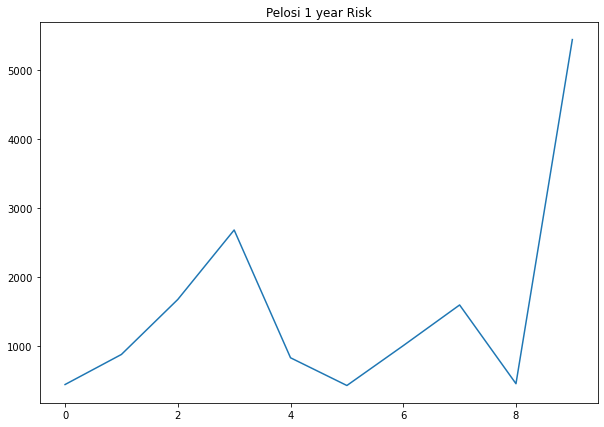

In [136]:
pelosi_funds['1 year risk'].plot(figsize=(10,7), title = "Pelosi 1 year Risk")

<AxesSubplot:title={'center':'Pelosi Fund returns'}, xlabel='Date'>

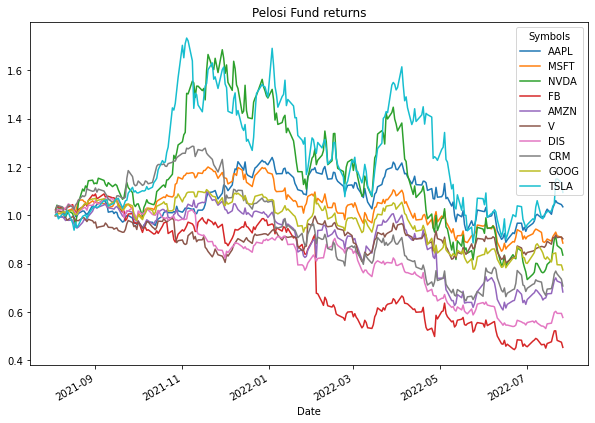

In [137]:
pelosi_cum_returns.plot(figsize=(10,7), title = "Pelosi Fund returns")

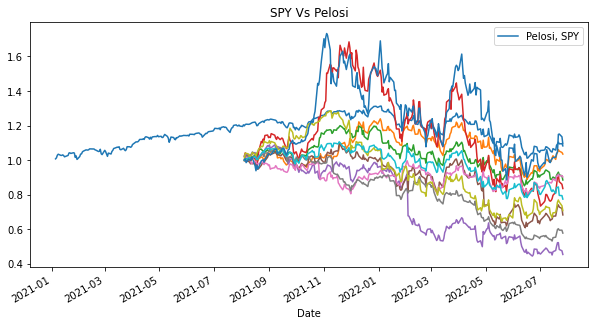

In [138]:
ax = spy_cum_returns.plot(
    legend="True",
    figsize=(10,5),
    title="SPY Vs Pelosi")
pelosi_cum_returns.plot(ax=ax)
ax.legend(["Pelosi, SPY"])

<AxesSubplot:>

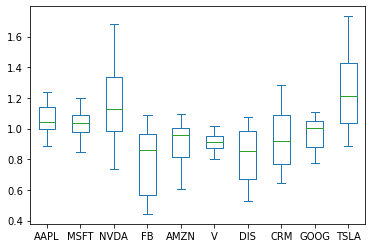

In [139]:
pelosi_cum_returns.plot(kind='box')

<AxesSubplot:>

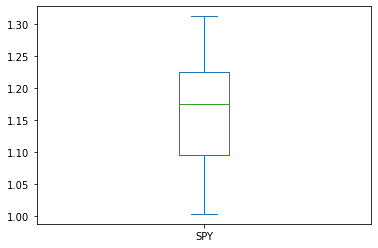

In [140]:
spy_cum_returns.plot(kind='box')

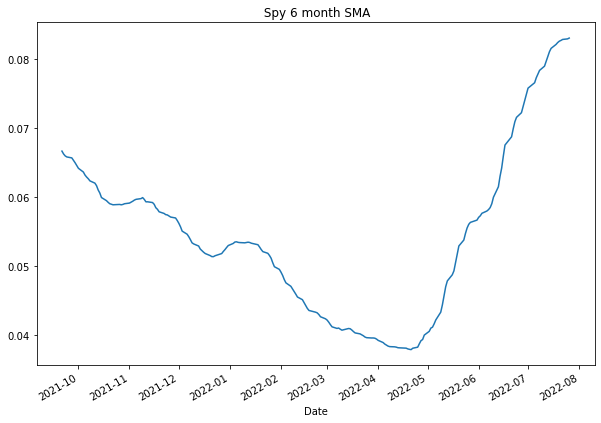

In [141]:
spy_std_180_day_rolling = spy_cum_returns["SPY"].rolling(window=180).std().plot( figsize=(10,7), title = " Spy 6 month SMA")

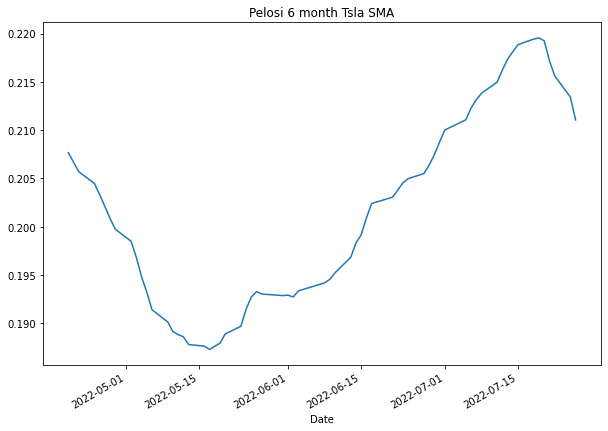

In [142]:
spy_std_365_day_rolling = pelosi_cum_returns["TSLA"].rolling(window=180).std().plot( figsize=(10,7), title = "Pelosi 6 month Tsla SMA")

<AxesSubplot:title={'center':'Pelosi Sharp Ratio'}, xlabel='Symbols'>

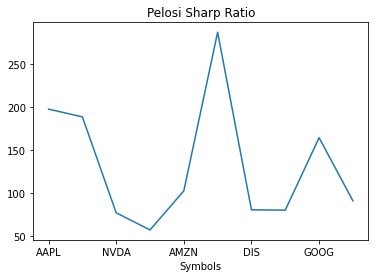

In [143]:
one_year_pelosi_sharpe_ratio = one_year_average_pelosi_return / one_year_pelosi_std
one_year_pelosi_sharpe_ratio.plot( title = "Pelosi Sharp Ratio")

TypeError: unsupported operand type(s) for +: 'AxesSubplot' and 'AxesSubplot'

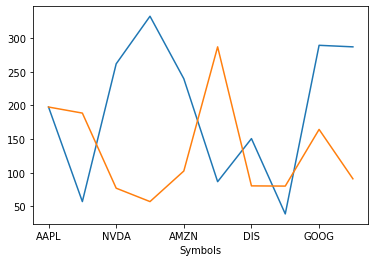

In [144]:
one_year_sheldon_sharpe_ratio.plot() + one_year_pelosi_sharpe_ratio.plot()

<AxesSubplot:title={'center':' Pelosi Covariance for APPLE'}, xlabel='Date'>

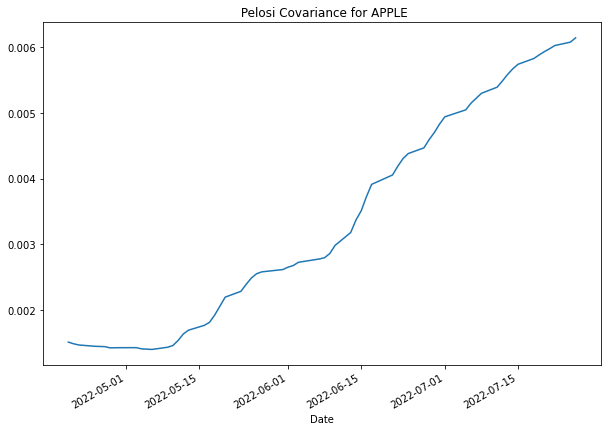

In [145]:
pelosi_rolling_180_covariance = pelosi_cum_returns['AAPL'].rolling(window=180).cov(spy_cum_returns['SPY'])
pelosi_rolling_180_covariance.plot(figsize=(10,7), title= " Pelosi Covariance for APPLE")

<AxesSubplot:title={'center':' Pelosi Covariance for TSLA'}, xlabel='Date'>

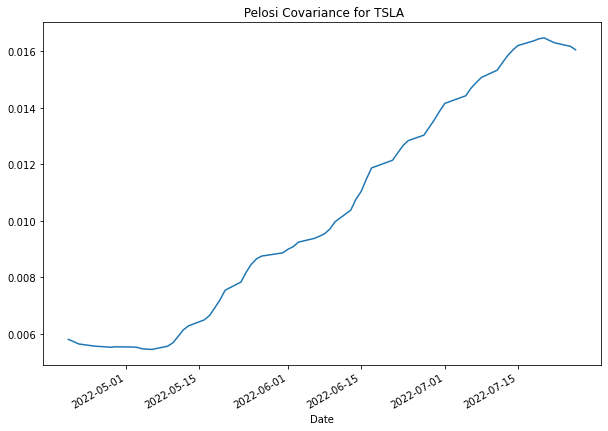

In [146]:
pelosi_rolling_180_covariance = pelosi_cum_returns['TSLA'].rolling(window=180).cov(spy_cum_returns['SPY'])
pelosi_rolling_180_covariance.plot(figsize=(10,7), title= " Pelosi Covariance for TSLA")

<AxesSubplot:title={'center':' Whitehouse Covariance for APPLE'}, xlabel='Date'>

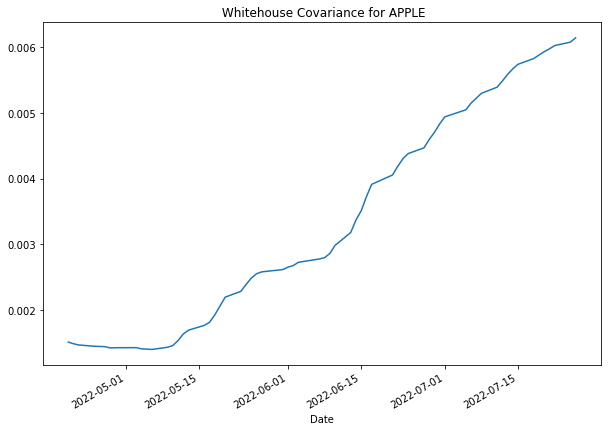

In [147]:
sheldon_rolling_180_covariance = sheldon_cummulative_returns['AAPL'].rolling(window=180).cov(spy_cum_returns['SPY'])
sheldon_rolling_180_covariance.plot(figsize=(10,7), title= " Whitehouse Covariance for APPLE")

In [148]:
pelosi_aapl_beta = pelosi_cum_returns['AAPL'].cov(spy_cum_returns['SPY']) / spy_cum_returns['SPY'].var()
pelosi_aapl_beta


0.640514518672132

In [149]:
pelosi_goog_beta = pelosi_cum_returns['GOOG'].cov(spy_cum_returns['SPY']) / spy_cum_returns['SPY'].var()
pelosi_goog_beta


1.0000147205556627

In [150]:
pelosi_v_beta = pelosi_cum_returns['V'].cov(spy_cum_returns['SPY']) / spy_cum_returns['SPY'].var()
pelosi_v_beta


0.2618662102547653

In [151]:
pelosi_msft_beta = pelosi_cum_returns['MSFT'].cov(spy_cum_returns['SPY']) / spy_cum_returns['SPY'].var()
pelosi_msft_beta

0.9370404554965172

In [152]:
pelosi_tsla_beta = pelosi_cum_returns['TSLA'].cov(spy_cum_returns['SPY']) / spy_cum_returns['SPY'].var()
pelosi_tsla_beta


1.8405816815798428

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

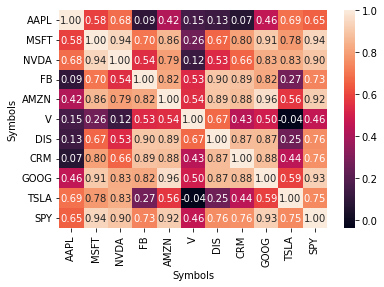

In [153]:
pelosi_spy_cumulative_returns = pd.concat([pelosi_cum_returns, spy_cum_returns], axis=1)

sns.heatmap(pelosi_spy_cumulative_returns.corr(), annot=True, fmt='.2f')

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

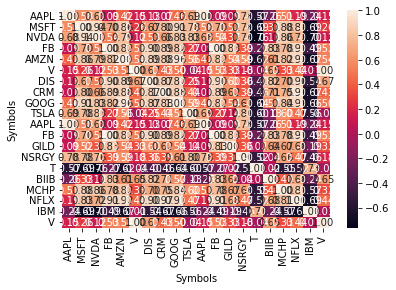

In [154]:
sheldon_cummulative_returns = pd.concat([pelosi_cum_returns, sheldon_cummulative_returns], axis=1)

sns.heatmap(sheldon_cummulative_returns.corr(), annot=True, fmt='.2f')

<AxesSubplot:title={'center':'SPY Probability Distribution'}, ylabel='Density'>

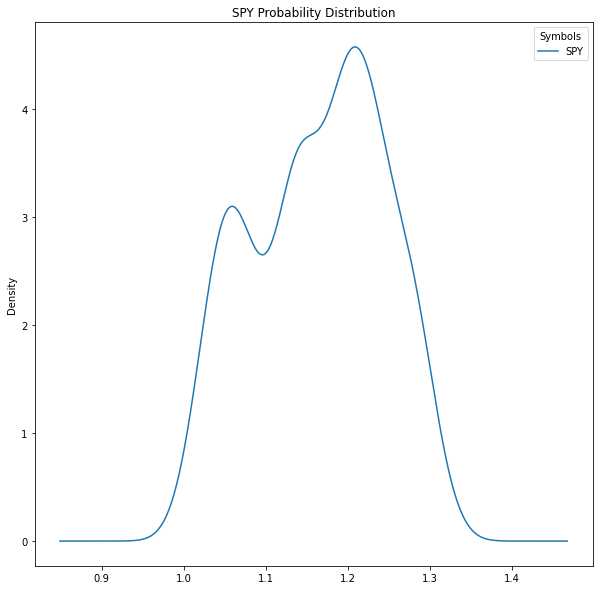

In [155]:
spy_cum_returns.plot.density(figsize=(10,10), title = "SPY Probability Distribution")

<AxesSubplot:title={'center':'Whitehouse Probability Distribution'}, ylabel='Density'>

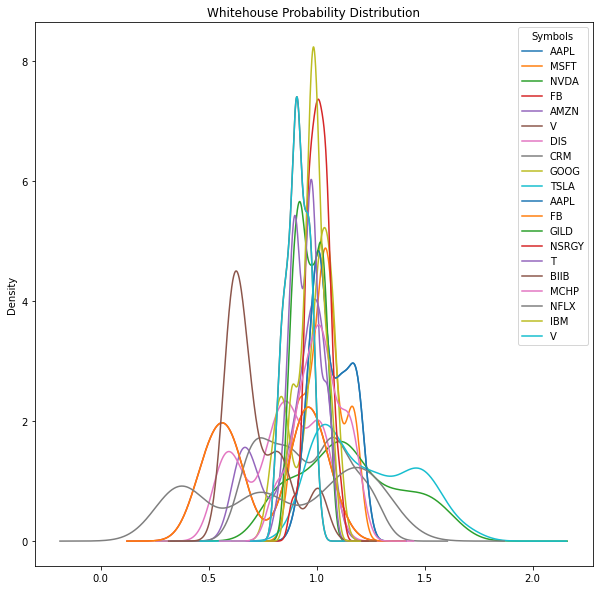

In [156]:
sheldon_cummulative_returns.plot.density(figsize=(10,10), title = "Whitehouse Probability Distribution")

<AxesSubplot:title={'center':'Pelosi Probability Distribution'}, ylabel='Density'>

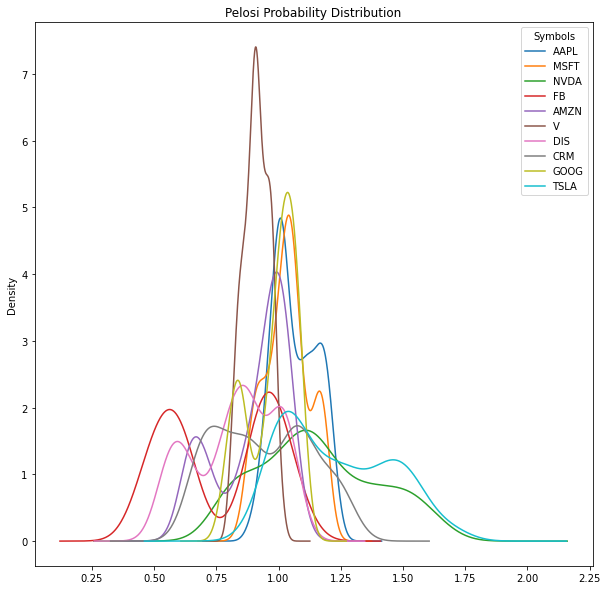

In [157]:
#Run analysis for new portfolio
pelosi_cum_returns.plot.density(figsize=(10,10), title = "Pelosi Probability Distribution")

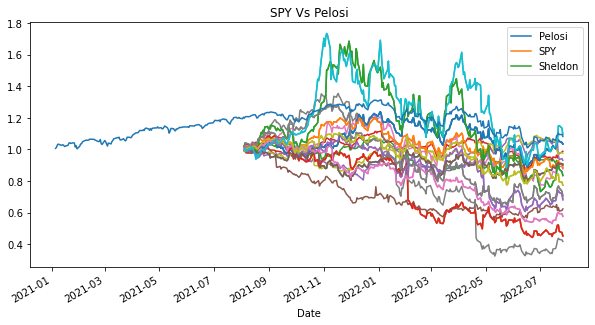

In [158]:
ax = sheldon_cummulative_returns.plot(
    legend="True",
    figsize=(10,5),
    title="SPY Vs Pelosi")
pelosi_cum_returns.plot(ax=ax)
spy_cum_returns.plot(ax=ax)

ax.legend(["Pelosi","SPY", "Sheldon"])

In [159]:
if one_year_pelosi_sharpe_ratio.sum() > spy_sharp_ratio.sum():
    print("Pelosi's portfolio has a better Risk/Return ratio than the SPY"),
else:
    print("SPY has a better Risk/Return ratio than Pelosi's portfolio")

Pelosi's portfolio has a better Risk/Return ratio than the SPY


In [160]:
if one_year_pelosi_std.sum() > one_year_spy_std.sum():
    print("Pelosi's stock portfolio is more volatile than the SPY")
else:
    print("SPY is more volatile than Pelosi's stock portfolio")

Pelosi's stock portfolio is more volatile than the SPY


In [161]:
if one_year_sheldon_sharpe_ratio.sum() > spy_sharp_ratio.sum():
    print("Sheldon's portfolio has a better Risk/Return ratio than the SPY"),
else:
    print("SPY has a better Risk/Return ratio than Sheldon's portfolio")
if one_year_sheldon_std.sum() > one_year_spy_std.sum():
    print("Sheldon's stock portfolio is more volatile than the SPY")
else:
    print("SPY is more volatile than Sheldon's stock portfolio")

Sheldon's portfolio has a better Risk/Return ratio than the SPY
Sheldon's stock portfolio is more volatile than the SPY


In [171]:
if one_year_pelosi_sharpe_ratio.sum() > one_year_sheldon_sharpe_ratio.sum():
    print("Pelosi's portfolio has a better Risk/Return ratio than Sheldon's")
else:
    print("Sheldon's portfolio has a better Risk/Return ratio than Pelosi's")

Sheldon's portfolio has a better Risk/Return ratio than Pelosi's


In [173]:
if one_year_pelosi_std.sum() > one_year_sheldon_std.sum():
    print("Pelosi's portfolio is more volatile than Sheldon's")
else:
    print("Sheldon's portfolio is more volatile than Pelosi's")

Pelosi's portfolio is more volatile than Sheldon's


In [186]:
pelosi_monte = pelosi_funds['1 year returns'].montecarlo(sims=1000, bust=-0.1, goal=1)






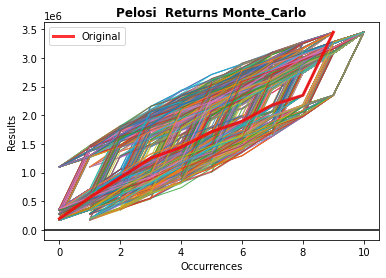

In [187]:
pelosi_monte.plot(title="Pelosi  Returns Monte_Carlo")

In [188]:
print(pelosi_monte.stats)

{'min': 3449000.0, 'max': 3449000.0, 'mean': 3449000.0, 'median': 3449000.0, 'std': 0.0, 'maxdd': nan, 'bust': 0.0, 'goal': 0.905}


In [190]:
sheldon_monte = whitehouse_stocks['1 Year Return'].montecarlo(sims=1000, bust=-0.1, goal=1)

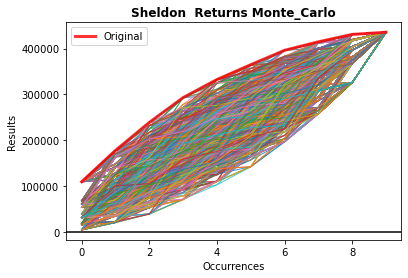

In [191]:
sheldon_monte.plot(title="Sheldon  Returns Monte_Carlo")

In [192]:
print(sheldon_monte.stats)

{'min': 435471.01931599993, 'max': 435471.0193160001, 'mean': 435471.0193160036, 'median': 435471.019316, 'std': 3.6021959378167824e-09, 'maxdd': nan, 'bust': 0.0, 'goal': 1.0}
